In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque
from matplotlib.animation import FuncAnimation, PillowWriter

In [20]:
np.random.seed(52)
random.seed(52)

def generar_laberinto_conectado(filas, columnas):
    # Asegurar que filas y columnas sean impares para el algoritmo
    if filas % 2 == 0:
        filas += 1
    if columnas % 2 == 0:
        columnas += 1
        
    # Inicializar laberinto con todas las paredes
    laberinto = [['1' for _ in range(columnas)] for _ in range(filas)]
    visitado = [[False for _ in range(columnas)] for _ in range(filas)]
    
    def vecinos(x, y):
        dirs = [(-2,0),(2,0),(0,-2),(0,2)]
        result = []
        for dx, dy in dirs:
            nx, ny = x+dx, y+dy
            if 0 <= nx < filas and 0 <= ny < columnas and not visitado[nx][ny]:
                result.append((nx, ny))
        random.shuffle(result)
        return result
    
    def dfs(x, y):
        visitado[x][y] = True
        laberinto[x][y] = '0'
        
        for nx, ny in vecinos(x, y):
            if not visitado[nx][ny]:
                # Elimina la pared entre celdas
                laberinto[(x+nx)//2][(y+ny)//2] = '0'
                dfs(nx, ny)
    
    # Comenzar desde una posición impar (esquina superior izquierda válida)
    start_x, start_y = 1, 1
    if start_x < filas and start_y < columnas:
        dfs(start_x, start_y)
    
    # Crear algunas aberturas adicionales para hacer el laberinto más interesante
    # y asegurar que no queden áreas completamente aisladas
    for i in range(3, filas-1, 4):
        for j in range(3, columnas-1, 4):
            if random.random() < 0.3:  # 30% probabilidad de crear apertura
                if i > 0 and laberinto[i-1][j] == '1':
                    laberinto[i-1][j] = '0'
                elif j > 0 and laberinto[i][j-1] == '1':
                    laberinto[i][j-1] = '0'
    
    return laberinto

laberinto_conectado = generar_laberinto_conectado(100, 100)

for fila in laberinto_conectado:
    print(''.join(fila))

11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
10100010000000000000001000000010000000100000000000001000000010000010000000000000000000000000000010001
10101010111011111111101110111110101111101011111111101110101110101010111111111110111011111010111010101
10001010100000001010001000100000100010001000101000001000100000101000000000000000000010001010001000101
11111010101111101010111010101111111010111110101011111010101111101011101111111110111110101010111110101
10000010000010001010001010100000001000100010101000100010101000001010001000100000100000101000100010101
10111110111110111010101011101111101111101010101110101110101011101010111010111011101111101110101011101
10100000000010001000100010001000000000001010100010001000100010101000001010001000100000001000001010001
10101111111011101010111010101011111111101010101011111011111110101111111011101011111110101011111010101
1000100010001000101000001010001010000000101010101000101000001000001000001010101000

# Convertir el laberinto a un array NumPy para visualizarlo

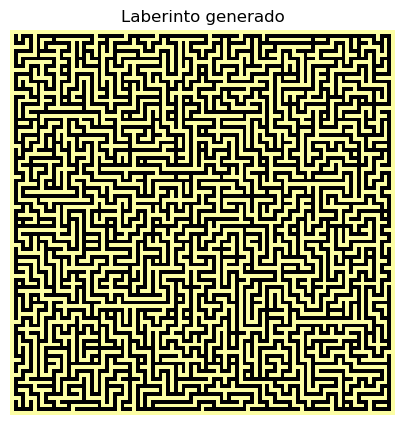

In [21]:
# Convertir el laberinto (lista de listas con '0' y '1') en un array NumPy de enteros
laberinto_array = np.array(laberinto_conectado, dtype=int)

# Visualización con matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(laberinto_array, cmap="inferno")  # 'binary' pone 0 en blanco y 1 en negro
plt.title("Laberinto generado")
plt.axis("off")
plt.show()

# Muestra Inicio, Fin

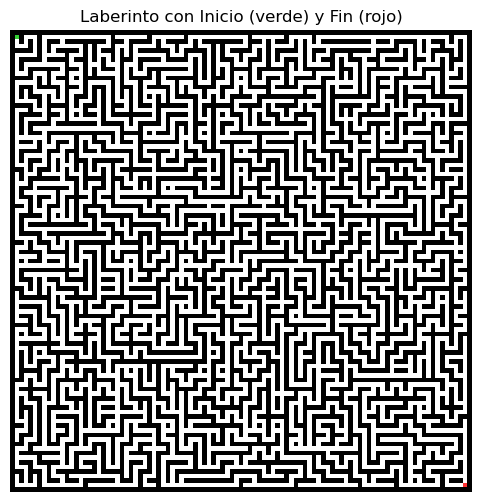

In [22]:
inicio = (1,1)
fin = (len(laberinto_array)-2, len(laberinto_array[0])-2)
img = laberinto_array.copy().astype(int)

# Colorear inicio y fin
si, sj = inicio
fi, fj = fin
img[si, sj] = 2   # inicio
img[fi, fj] = 3   # fin

# Definir colores: 0 = libre (blanco), 1 = pared (negro), 2 = inicio (verde), 3 = fin (rojo)
cmap = ListedColormap([
    (1,1,1),      # 0 libre - blanco
    (0,0,0),      # 1 pared - negro
    (0.2,0.8,0.2),# 2 inicio - verde
    (1,0.2,0.2),  # 3 fin - rojo
])

# Mostrar
plt.figure(figsize=(6,6))
plt.imshow(img, cmap=cmap, vmin=0, vmax=3)
plt.title("Laberinto con Inicio (verde) y Fin (rojo)")
plt.axis("off")
plt.show()


# Muestra parcialmente la ruta tomada.

In [ ]:
# --- BFS para ruta más corta y trazas ---


def bfs_shortest_path(grid, start, goal):
    filas, cols = grid.shape
    en_rango = lambda r,c: 0 <= r < filas and 0 <= c < cols
    libres = lambda r,c: grid[r,c] == 0  # 0 = libre, 1 = pared

    q = deque([start])
    padres = {start: None}
    explorados = []  # orden en que se visitan
    while q:
        r,c = q.popleft()
        explorados.append((r,c))
        if (r,c) == goal:
            break
        for dr,dc in [(-1,0),(1,0),(0,-1),(0,1)]:
            nr,nc = r+dr, c+dc
            if en_rango(nr,nc) and libres(nr,nc) and (nr,nc) not in padres:
                padres[(nr,nc)] = (r,c)
                q.append((nr,nc))

    # Reconstituir la ruta si se llegó al goal
    path = []
    if goal in padres:
        cur = goal
        while cur is not None:
            path.append(cur)
            cur = padres[cur]
        path.reverse()
    return explorados, path

explorados_bfs, ruta_bfs = bfs_shortest_path(laberinto_array, inicio, fin)

# --- Preparar visualización con slider ---
# Mapa de colores: 0=libre (blanco), 1=pared (negro), 2=explorado (azul claro), 3=ruta (amarillo),
# 4=inicio (verde), 5=fin (rojo)
cmap = ListedColormap([
    (1,1,1),      # 0 libre - blanco
    (0,0,0),      # 1 pared - negro
    (0.5,0.8,1),  # 2 explorado - azul claro
    (1,1,0.2),    # 3 ruta - amarillo
    (0.2,0.8,0.2),# 4 inicio - verde
    (1,0.2,0.2),  # 5 fin - rojo
])

total_frames = len(explorados_bfs) + (len(ruta_bfs) if len(ruta_bfs)>0 else 0)

def frame_to_image(frame_idx):
    """
    En los primeros 'len(explorados)' frames se marcan nodos explorados.
    Luego se dibuja la ruta, de forma incremental.
    """
    img = laberinto_array.copy().astype(int)  # 0 y 1

    # 1) Explorado
    k = min(frame_idx, len(explorados_bfs))
    for (r,c) in explorados_bfs[:k]:
        if (r,c) != inicio and (r,c) != fin and img[r,c] == 0:
            img[r,c] = 2

    # 2) Ruta (después de terminar exploración)
    if len(ruta_bfs) > 0 and frame_idx > len(explorados_bfs):
        rframes = frame_idx - len(explorados_bfs)
        for (r,c) in ruta_bfs[:rframes]:
            if (r,c) != inicio and (r,c) != fin:
                img[r,c] = 3

    # 3) Inicio y Fin
    si,sj = inicio
    fi,fj = fin
    img[si,sj] = 4
    img[fi,fj] = 5
    return img

@widgets.interact(frame=widgets.IntSlider(min=0, max=max(0, total_frames), step=1, value=0, description="Paso"))
def mostrar(frame=0):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(frame_to_image(frame), cmap=cmap, vmin=0, vmax=5)
    ax.set_title(f"Exploración BFS y Ruta (frame {frame}/{total_frames})")
    ax.axis("off")
    plt.show()


interactive(children=(IntSlider(value=0, description='Paso', max=5405), Output()), _dom_classes=('widget-inter…